#Tema 7<br>
###Exercitiul 1 <br>
a)

<Axes: >

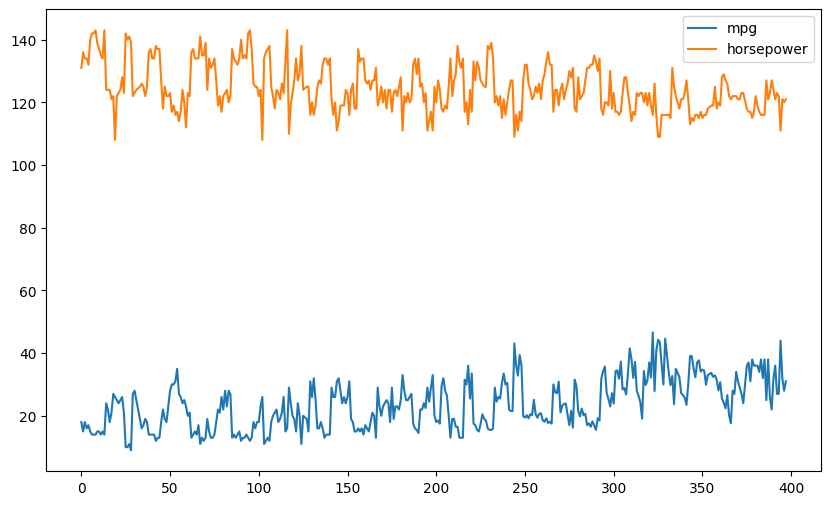

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
import numpy as np

df = pd.read_csv('/content/auto-mpg.csv')
df.drop([column for column in df.columns if column not in ['mpg', 'horsepower']], axis=1, inplace=True)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df.dropna(subset=['horsepower'], inplace=True)
df.plot(y=['mpg', 'horsepower'], kind='line', figsize=(10, 6))




Din Graficul afisat se observa ca mpg si horsepower sunt invers proportionale. O masina cu mai putini cai putere va avea consumul mai mare.<br>
Mai departe ne dorim ca in functie de horsepower sa prezicem mpg.<br>
b)

0 0


Output()

Output()

Output()

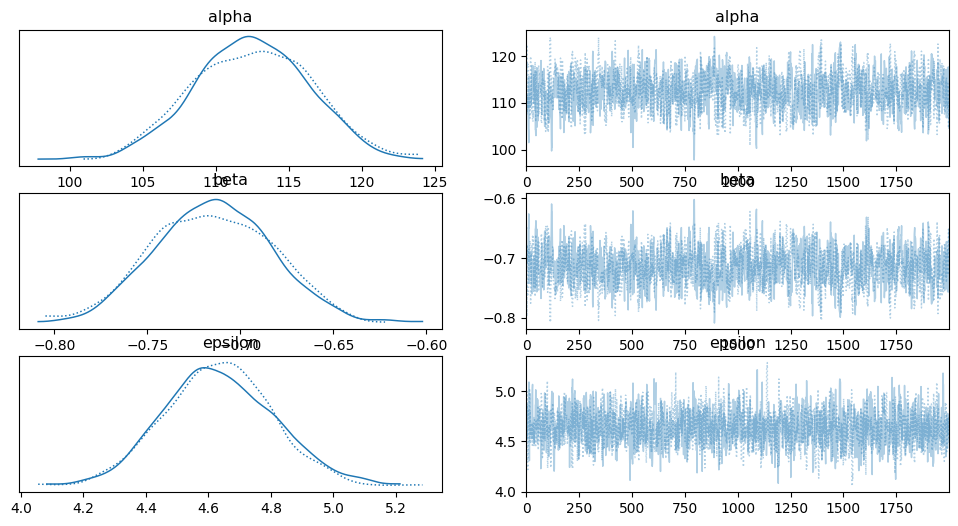

In [13]:
x = df['horsepower']
y = df['mpg']

print(df['horsepower'].isnull().sum(), df['mpg'].isnull().sum())  # Check for NaNs


with pm.Model() as model:
  alpha = pm.Normal('alpha', mu = 0, sigma = 10)
  beta = pm.Normal('beta', mu = 0, sigma = 1)
  epsilon = pm.HalfCauchy('epsilon', 5)
  mu = pm.Deterministic('mu', alpha + beta * x)
  y_pred = pm.Normal('y_pred', mu = mu, sigma = epsilon, observed = y)

  idata_g = pm.sample(2000, tune=2000, return_inferencedata=True)
  ppc = pm.sample_posterior_predictive(idata_g, var_names=['y_pred'], model=model)

  az.plot_trace(idata_g, var_names=['alpha', 'beta', 'epsilon'])

c)

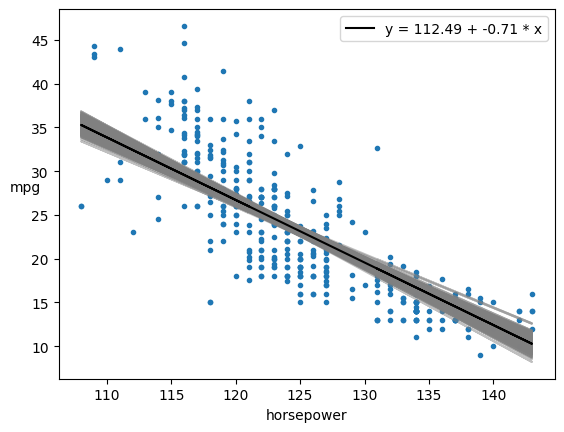

In [14]:
plt.plot(x, y, 'C0.')
posterior_g = idata_g.posterior.stack(samples={"chain", "draw"})
alpha_m = posterior_g['alpha'].mean().item()
beta_m = posterior_g['beta'].mean().item()
draws = range(0, posterior_g.samples.size, 10)
plt.plot(x, posterior_g['alpha'][draws].values + posterior_g['beta'][draws].values * np.array(x)[:,None], c='gray', alpha=0.5)
plt.plot(x, alpha_m + beta_m * x, c='k', label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
plt.xlabel('horsepower')
plt.ylabel('mpg', rotation=0)
plt.legend()

d)

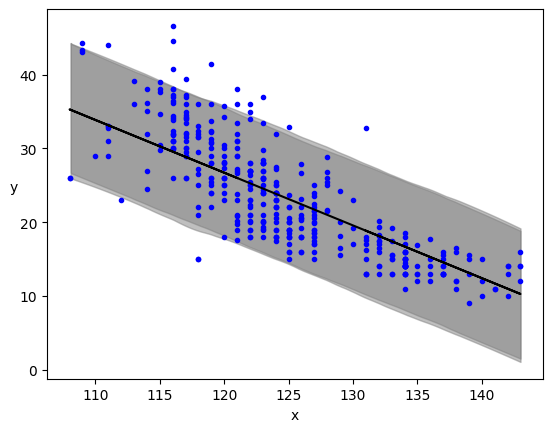

In [15]:
plt.plot(x, y, 'b.')
plt.plot(x, alpha_m + beta_m * x, c='k', label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
az.plot_hdi(x, ppc.posterior_predictive['y_pred'], hdi_prob=0.95, color='gray')
az.plot_hdi(x, ppc.posterior_predictive['y_pred'], color='gray')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.show()

###Exercitiul 2
a)

Output()

Output()

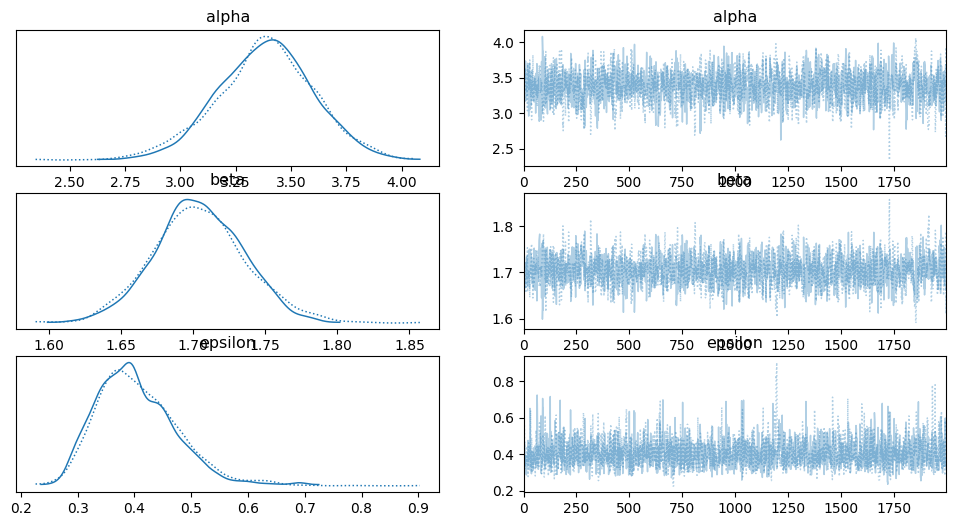

In [32]:

x = [1.5, 2.0, 2.3, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0]
y = [5.2, 6.8, 7.5, 8.0, 9.0, 10.2, 11.5, 12.0, 13.5, 14.0, 15.0, 15.5, 16.2, 17.0, 18.0, 18.5, 19.5, 20.0, 21.0, 22.0]

with pm.Model() as model:
  alpha = pm.Normal('alpha', mu = 0, sigma = 10)
  beta = pm.Normal('beta', mu = 0, sigma = 1)
  epsilon = pm.HalfCauchy('epsilon', 5)
  mu = pm.Deterministic('mu', alpha + beta * x)
  y_pred = pm.Normal('y_pred', mu = mu, sigma = epsilon, observed = y)

  idata_g = pm.sample(2000, tune=2000, return_inferencedata=True)
  #ppc = pm.sample_posterior_predictive(idata_g, var_names=['y_pred'], model=model)

  az.plot_trace(idata_g, var_names=['alpha', 'beta', 'epsilon'])

b)

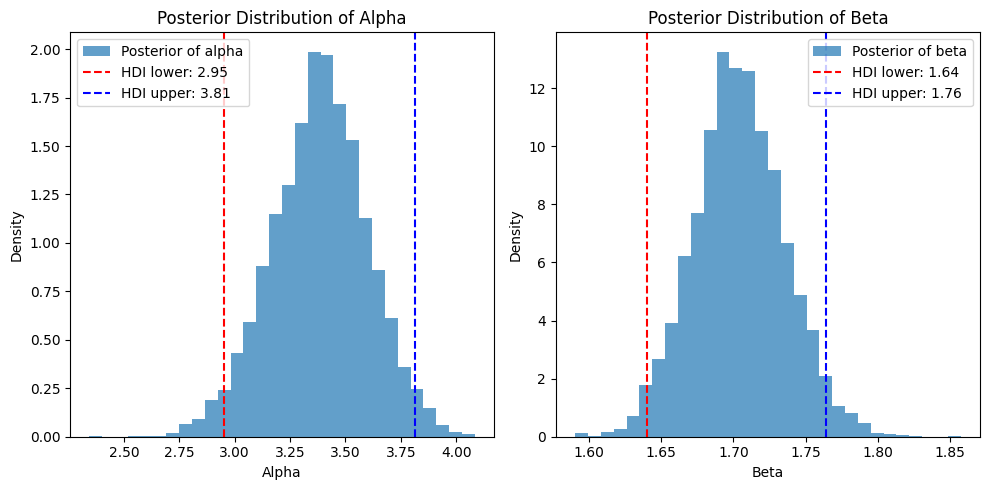

In [33]:
alpha_hdi = az.hdi(idata_g.posterior['alpha'], hdi_prob=0.95)  # 95% HDI for alpha
beta_hdi = az.hdi(idata_g.posterior['beta'], hdi_prob=0.95)    # 95% HDI for beta

alpha_hdi_lower = alpha_hdi['alpha'].sel(hdi='lower').values
alpha_hdi_upper = alpha_hdi['alpha'].sel(hdi='higher').values

beta_hdi_lower = beta_hdi['beta'].sel(hdi='lower').values
beta_hdi_upper = beta_hdi['beta'].sel(hdi='higher').values

alpha_samples = idata_g.posterior['alpha'].values.flatten()
beta_samples = idata_g.posterior['beta'].values.flatten()

# Plot posterior for alpha
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(alpha_samples, bins=30, density=True, alpha=0.7, label='Posterior of alpha')
plt.axvline(alpha_hdi_lower, color='red', linestyle='--', label=f'HDI lower: {alpha_hdi_lower:.2f}')
plt.axvline(alpha_hdi_upper, color='blue', linestyle='--', label=f'HDI upper: {alpha_hdi_upper:.2f}')
plt.title('Posterior Distribution of Alpha')
plt.xlabel('Alpha')
plt.ylabel('Density')
plt.legend()

# Plot posterior for beta
plt.subplot(1, 2, 2)
plt.hist(beta_samples, bins=30, density=True, alpha=0.7, label='Posterior of beta')
plt.axvline(beta_hdi_lower, color='red', linestyle='--', label=f'HDI lower: {beta_hdi_lower:.2f}')
plt.axvline(beta_hdi_upper, color='blue', linestyle='--', label=f'HDI upper: {beta_hdi_upper:.2f}')
plt.title('Posterior Distribution of Beta')
plt.xlabel('Beta')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

c)<br>
Pentru a prezice un venit y_pred in functie de un cost pentru publicitate x_q tot ce trebuie sa facem e sa ne folosim de parametrii estimati anterior.<br>
y_pred = alpha + beta * x_q


In [36]:
posterior_g = idata_g.posterior.stack(samples={"chain", "draw"})
alpha_m = posterior_g['alpha'].mean().item()
beta_m = posterior_g['beta'].mean().item()

new_data = np.array([1, 12, 13])
predictions = alpha_m + beta_m * new_data

print(predictions)



[ 5.08808547 23.83444688 25.53866156]
